In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Question 1

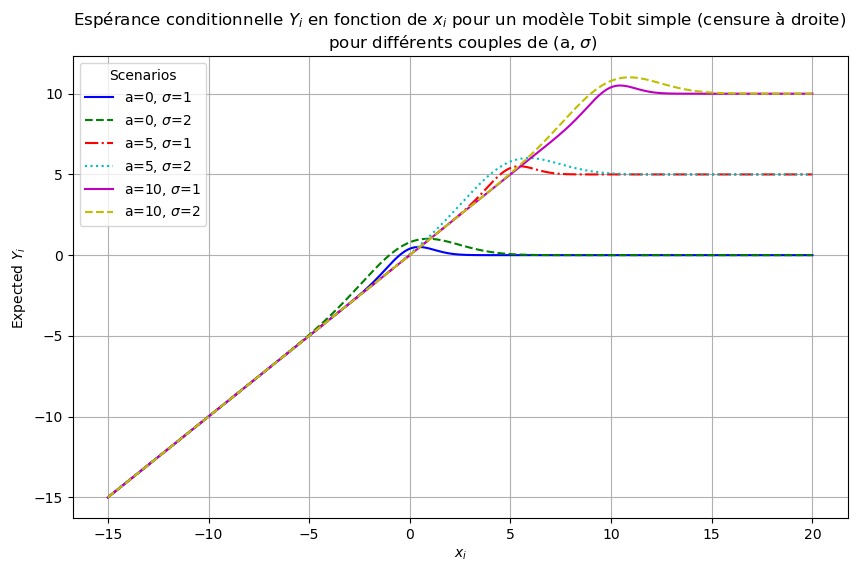

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Définition des paramètres des scénarios (couple (a, sigma))
scenarios = [(0, 1), (0, 2), (5, 1), (5, 2), (10, 1), (10, 2)]
colors = ['b', 'g', 'r', 'c', 'm', 'y']  
linestyles = ['-', '--', '-.', ':', '-', '--']  

#Domaine de variation de x_i (-15 à 20)
x_i = np.linspace(-15, 20, 400)
epsilon = 1e-5  # Petite valeur pour éviter la division par zéro

#Création de l'espace graphique
plt.figure(figsize=(10, 6))

#Boucle pour calculculer l'espérance conditionnelle E(Y_i | x_i) pour chacun des couples
for (a, sigma), color, linestyle in zip(scenarios, colors, linestyles):
    cdf_values = norm.cdf((a - x_i) / sigma)
    pdf_values = norm.pdf((a - x_i) / sigma)
    E_Y_given_x = cdf_values * x_i + \
                  (1 - cdf_values) * (a + sigma * pdf_values / (1 - cdf_values + epsilon))
    
    #Tracer la courbe pour chaque scénario
    plt.plot(x_i, E_Y_given_x, color=color, linestyle=linestyle,
             label=f'a={a}, $\sigma$={sigma}')

#Ajout de détails au graphique
plt.title("Espérance conditionnelle $Y_i$ en fonction de $x_i$ pour un modèle Tobit simple (censure à droite) \n pour différents couples de (a, $\sigma$)")
plt.xlabel('$x_i$')
plt.ylabel('Expected $Y_i$')
plt.legend(title="Scenarios")
plt.grid(True)
plt.show()

# Question 2

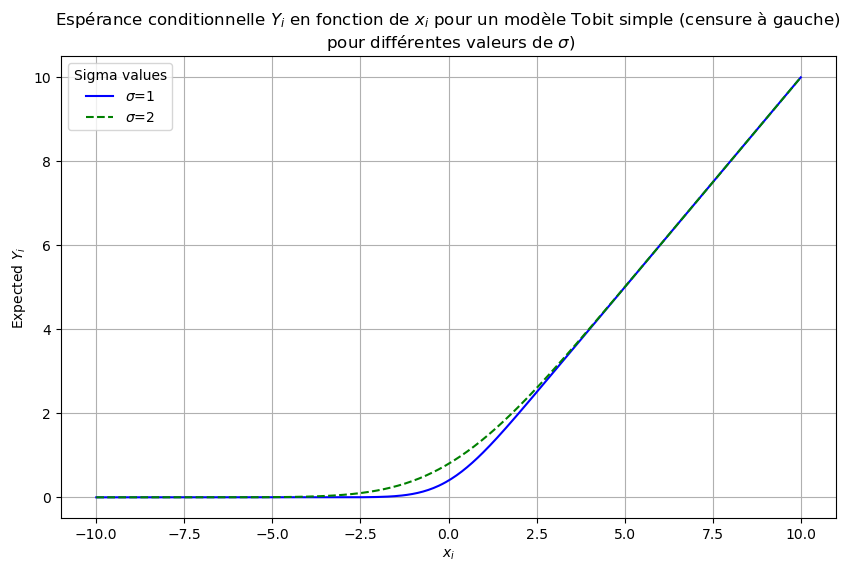

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Définir les paramètres des scénarios (sigma 1 et 2 uniquement, puisque a = 0 pour tous)
sigmas = [1, 2]
colors = ['b', 'g', 'r', 'c'] 
linestyles = ['-', '--', '-.', ':']  

#Domaine de variation de x_i (-10 à 10)
x_i = np.linspace(-10, 10, 400)

#Création de l'espace graphique
plt.figure(figsize=(10, 6))

#Boucle pour calculculer l'espérance conditionnelle E(Y_i | x_i) pour chacun des sigmas
for sigma, color, linestyle in zip(sigmas, colors, linestyles):
    # Calcul de l'espérance conditionnelle E(Y_i | x_i)
    cdf_values = norm.cdf(-x_i / sigma)
    pdf_values = norm.pdf(-x_i / sigma)
    E_Y_given_x = (1 - cdf_values) * (x_i + sigma * pdf_values / (1 - cdf_values + 1e-5))
    
    # Tracer la courbe pour chaque scénario
    plt.plot(x_i, E_Y_given_x, color=color, linestyle=linestyle,
             label=f'$\sigma$={sigma}')

# Ajout de détails au graphique
plt.title("Espérance conditionnelle $Y_i$ en fonction de $x_i$ pour un modèle Tobit simple (censure à gauche) \n pour différentes valeurs de $\sigma$)")
plt.xlabel('$x_i$')
plt.ylabel('Expected $Y_i$')
plt.legend(title="Sigma values")
plt.grid(True)
plt.show()

Impact de 
𝑥
𝑖
𝛽
x 
i
​
β: 

        Quand 𝑥𝑖𝛽 est négatif ou proche de zéro : 
 
La probabilité que 
𝑌
𝑖
∗
Y 
i
∗
​
  soit moins ou égal à zéro est élevée, donc 
𝑌
𝑖
Y 
i
​
  sera souvent censuré à 0. Cela entraîne une espérance conditionnelle faible ou nulle.
  
        Quand 𝑥𝑖𝛽 est positif : 
𝑌
𝑖
∗
Y 
i
∗
​
  a de plus grandes chances d'être supérieur à zéro, donc 
𝑌
𝑖
Y 
i
​
  prendra des valeurs plus élevées, augmentant ainsi l'espérance conditionnelle.



Impact de σ (l'écart-type de l'erreur) :

        𝜎 faible : 
Quand l'écart-type est faible, les valeurs de 
𝑌
𝑖
∗
Y 
i
∗
​
  sont plus proches de 
𝑥
𝑖
𝛽
x 
i
​
 β (moins de dispersion). Cela signifie que si 
𝑥
𝑖
𝛽
x 
i
​
 β est positif, 
𝑌
𝑖
∗
Y 
i
∗
​
  est très probablement positif, et si 
𝑥
𝑖
𝛽
x 
i
​
 β est négatif, 
𝑌
𝑖
∗
Y 
i
∗
​
  est négatif, rendant 
𝑌
𝑖
Y 
i
​
  souvent égal à 0.
  
        𝜎 élevé: 
Un grand écart-type augmente la dispersion autour de 
𝑥
𝑖
𝛽
x 
i
​
 β. Même si 
𝑥
𝑖
𝛽
x 
i
​
 β est légèrement négatif, 
𝑌
𝑖
∗
Y 
i
∗
​
  pourrait dépasser 0 à cause de la grande variabilité, réduisant ainsi la fréquence de censure à 0 et augmentant l'espérance conditionnelle de 
𝑌
𝑖
Y 
i
​
 .
 
Courbes pour différentes valeurs de 
𝜎
σ : Chaque courbe montre une transition de 
𝑌
𝑖
=
0
Y 
i
​
 =0 à des valeurs positives de 
𝑌
𝑖
Y 
i
​
 , mais à des taux différents en fonction de 
𝜎
σ. Les courbes avec un 
𝜎
σ plus élevé montrent une transition plus douce, car l'incertitude plus grande autour de 
𝑥
𝑖
𝛽
=
0
x 
i
​
 β=0 permet à plus de valeurs de dépasser la censure.
 
En somme, l'espérance conditionnelle dans ce modèle Tobit nous donne une idée de la probabilité et de l'ampleur avec laquelle 
𝑌
𝑖
Y 
i
​
  sera différent de zéro en fonction des valeurs prédictives 
𝑥
𝑖
𝛽
x 
i
​
 β et de la variabilité de l'erreur (
𝜎). Les scénarios avec une censure et des valeurs de 
𝜎 variées montrent l'importance de ces paramètres dans la modélisation des processus censurés.

# Question 3

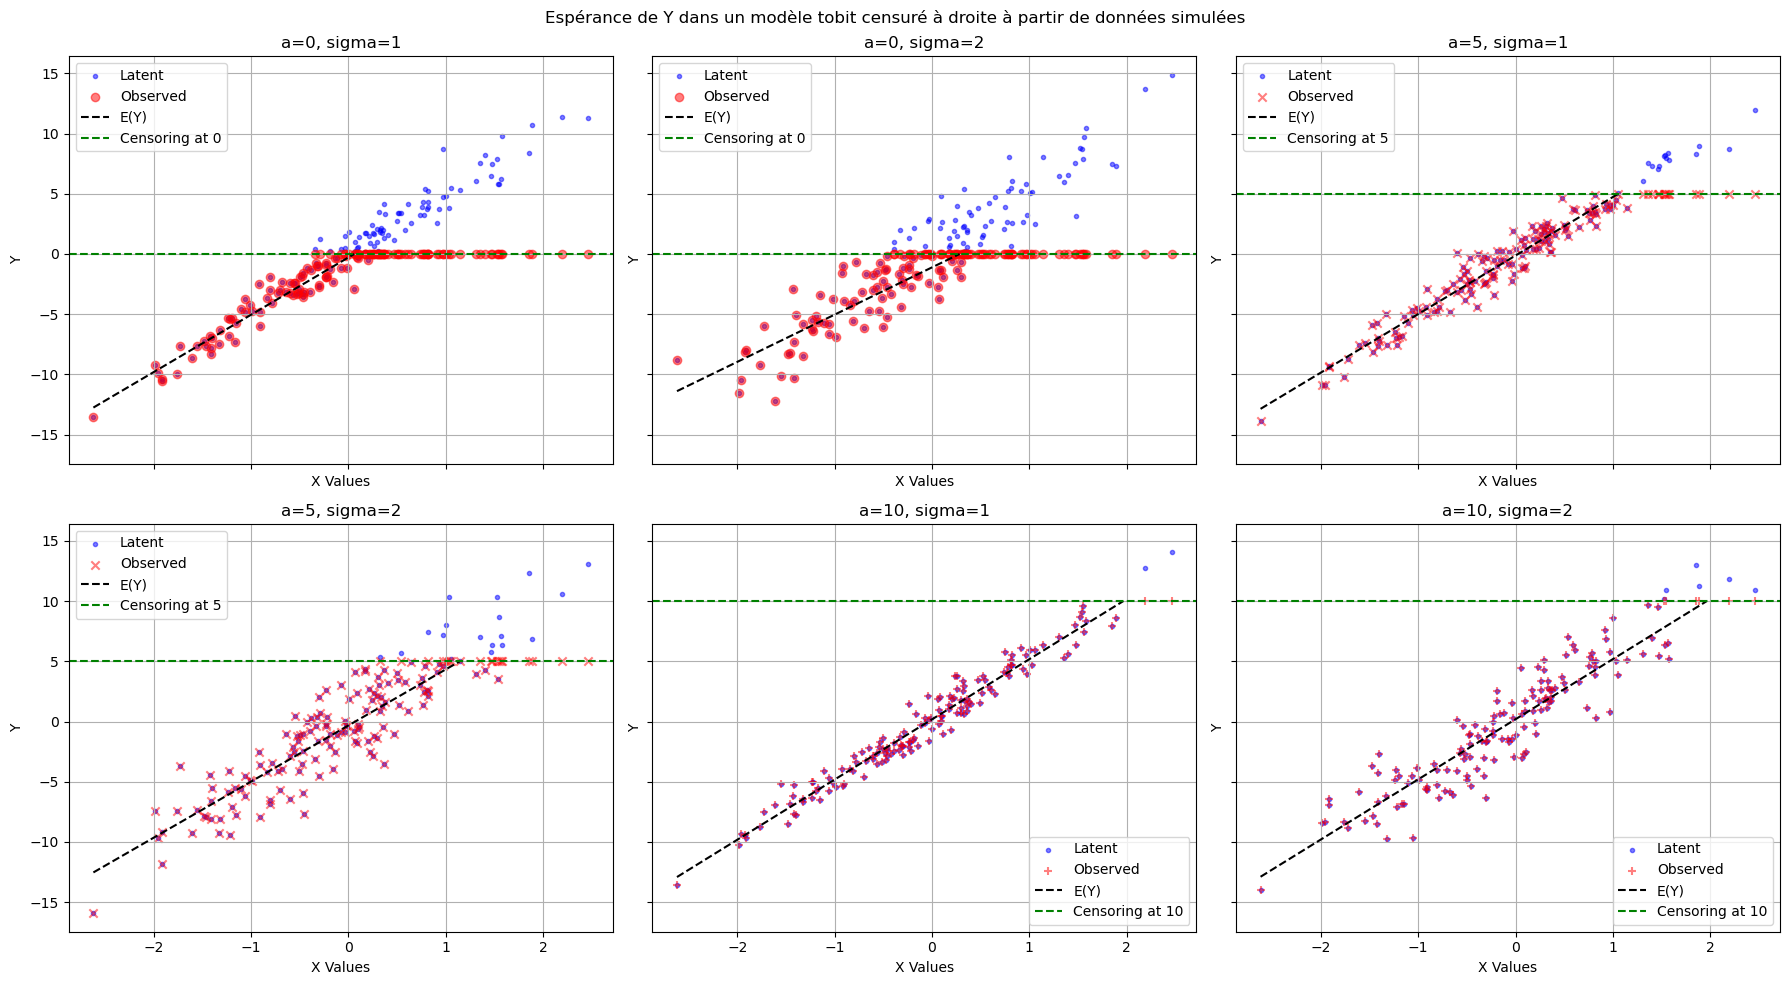

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

class RightCensoredTobitModel:
    def __init__(self, censoring_value, sigma):
        self.censoring_value = censoring_value
        self.sigma = sigma
    
    def log_likelihood(self, params):
        X, y = self.X, self.y
        sigma = self.sigma
        beta = params
        y_hat = X.dot(beta)
        ll = 0
        
        # Right censored
        right_mask = y >= self.censoring_value
        z_right = (y_hat[right_mask] - self.censoring_value) / sigma
        ll += np.sum(norm.logcdf(-z_right))
        
        # Uncensored
        uncensored_mask = ~right_mask
        z_uncensored = (y[uncensored_mask] - y_hat[uncensored_mask]) / sigma
        ll += np.sum(norm.logpdf(z_uncensored))
        
        return -ll

    def fit(self, X, y):
        uncensored_mask = y < self.censoring_value
        self.X = np.hstack([np.ones((X[uncensored_mask].shape[0], 1)), X[uncensored_mask]])
        self.y = y[uncensored_mask]
        initial_params = np.zeros(self.X.shape[1])
        result = minimize(self.log_likelihood, initial_params, method='BFGS')
        self.beta = result.x
        return result

# Set the scenario parameters
scenarios = [(0, 1), (0, 2), (5, 1), (5, 2), (10, 1), (10, 2)]
markers = ['o', 'o', 'x', 'x', '+', '+']
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

np.random.seed(42)
X = np.random.normal(size=(150, 1))
beta = np.array([5])

for ax, (a, sigma), marker in zip(axes.flatten(), scenarios, markers):
    y_star = X.dot(beta) + sigma * np.random.normal(size=150)
    y_obs = np.minimum(y_star, a)
    tobit_model = RightCensoredTobitModel(censoring_value=a, sigma=sigma)
    result = tobit_model.fit(X, y_obs)
    
    # Calculate the X value where prediction meets the censoring level
    intercept = tobit_model.beta[0]
    slope = tobit_model.beta[1]
    if slope != 0:
        x_limit = (a - intercept) / slope
    else:
        x_limit = X.max()

    # Generate X values for plotting up to the censoring limit
    X_plot = np.linspace(X.min(), x_limit, 100)
    X_plot_bias = np.hstack([np.ones((X_plot.shape[0], 1)), X_plot.reshape(-1, 1)])
    y_hat = X_plot_bias.dot(tobit_model.beta)

    # Plotting
    ax.scatter(X[:, 0], y_star, alpha=0.5, color='blue', marker='.', label='Latent')
    ax.scatter(X[:, 0], y_obs, alpha=0.5, color='red', marker=marker, label='Observed')
    ax.plot(X_plot, y_hat, 'k--', label='E(Y)')  # Plotting the prediction up to censoring limit
    ax.axhline(y=a, color='green', linestyle='--', label=f'Censoring at {a}')
    ax.set_title(f'a={a}, sigma={sigma}')
    ax.set_xlabel('X Values')
    ax.set_ylabel('Y')
    ax.grid(True)
    ax.legend()

plt.suptitle("Espérance de Y dans un modèle tobit censuré à droite à partir de données simulées")
plt.tight_layout()
plt.show()

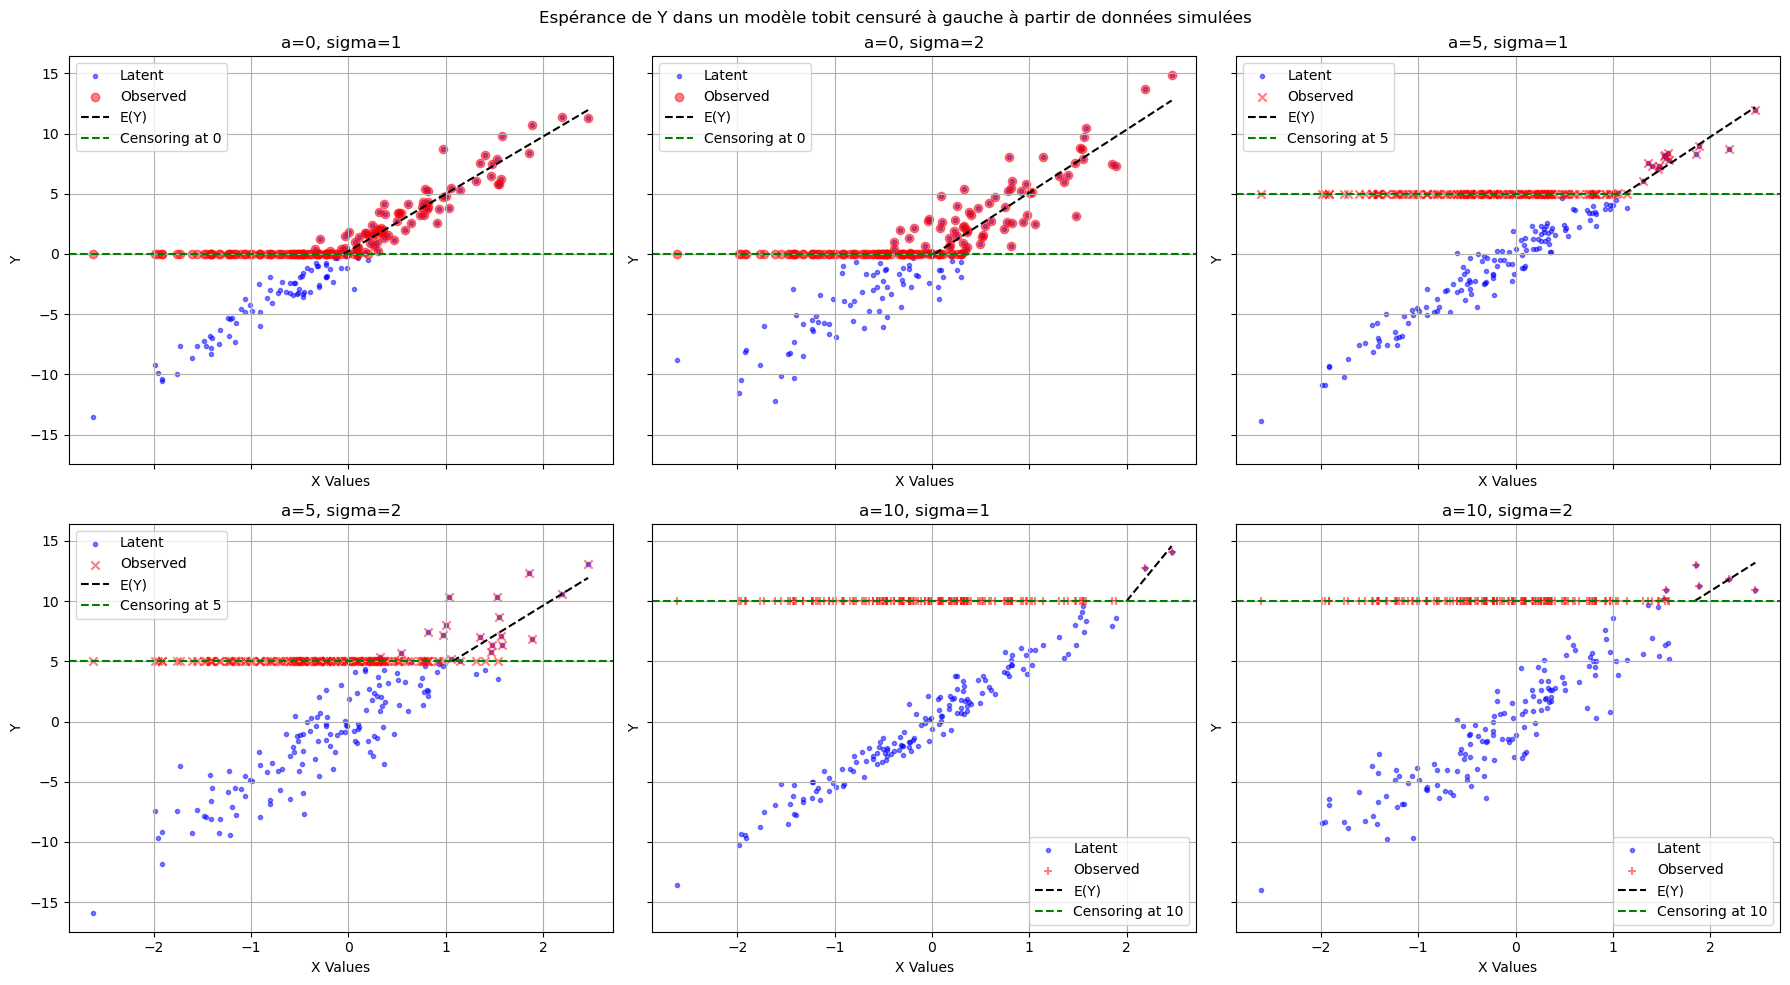

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

class LeftCensoredTobitModel:
    def __init__(self, censoring_value, sigma):
        self.censoring_value = censoring_value
        self.sigma = sigma
    
    def log_likelihood(self, params):
        X, y = self.X, self.y
        sigma = self.sigma
        beta = params
        y_hat = X.dot(beta)
        ll = 0
        
        # Left censored
        left_mask = y <= self.censoring_value
        z_left = (self.censoring_value - y_hat[left_mask]) / sigma
        ll += np.sum(norm.logcdf(z_left))
        
        # Uncensored
        uncensored_mask = ~left_mask
        z_uncensored = (y[uncensored_mask] - y_hat[uncensored_mask]) / sigma
        ll += np.sum(norm.logpdf(z_uncensored))
        
        return -ll

    def fit(self, X, y):
        self.X = np.hstack([np.ones((X.shape[0], 1)), X])  # add intercept
        self.y = y
        initial_params = np.zeros(self.X.shape[1])
        result = minimize(self.log_likelihood, initial_params, method='BFGS')
        self.beta = result.x
        return result

# Set the scenario parameters
scenarios = [(0, 1), (0, 2), (5, 1), (5, 2), (10, 1), (10, 2)]
markers = ['o', 'o', 'x', 'x', '+', '+']
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

np.random.seed(42)
X = np.random.normal(size=(150, 1))
beta = np.array([5])

for ax, (a, sigma), marker in zip(axes.flatten(), scenarios, markers):
    y_star = X.dot(beta) + sigma * np.random.normal(size=150)
    y_obs = np.where(y_star <= a, a, y_star)
    tobit_model = LeftCensoredTobitModel(censoring_value=a, sigma=sigma)
    result = tobit_model.fit(X, y_obs)
    
    # Predictions for plot
    intercept = tobit_model.beta[0]
    slope = tobit_model.beta[1]
    x_intersect = (a - intercept) / slope if slope != 0 else 0 
    X_plot = np.linspace(x_intersect, X.max(), 100)
    X_plot_bias = np.hstack([np.ones((X_plot.shape[0], 1)), X_plot.reshape(-1, 1)])
    y_hat = X_plot_bias.dot(tobit_model.beta)
    
    # Plotting
    ax.scatter(X[:, 0], y_star, alpha=0.5, color='blue', marker='.', label='Latent')
    ax.scatter(X[:, 0], y_obs, alpha=0.5, color='red', marker=marker, label='Observed')
    ax.plot(X_plot, y_hat, 'k--', label='E(Y)') 
    ax.axhline(y=a, color='green', linestyle='--', label=f'Censoring at {a}')
    ax.set_title(f'a={a}, sigma={sigma}')
    ax.set_xlabel('X Values') 
    ax.set_ylabel('Y') 
    ax.grid(True)
    ax.legend()

plt.suptitle("Espérance de Y dans un modèle tobit censuré à gauche à partir de données simulées")
plt.tight_layout()
plt.show()